In [27]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

# Style
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")

output_notebook()

Loading BokehJS ...

# Query 1 - Percentage of canceled flights per day

In [28]:
# Load data from csv
canceled_df = pd.read_csv('query1.csv/part-00000-52553417-36e9-4c25-b381-2f5ee8d6c911-c000.csv', parse_dates=False)
canceled_df.head()

,Year,Month,DayofMonth,percentageCancelled
0,1994,1,1,0.005264
1,1994,1,2,0.004492
2,1994,1,3,0.015418
3,1994,1,4,0.155609
4,1994,1,5,0.047656


In [29]:
# Build datetimes from Year, Month, Day columns
canceled_df.rename(columns={'DayofMonth': 'Day'}, inplace=True)
dates = pd.to_datetime(canceled_df[['Year', 'Month', 'Day']])

# Add Date to the original DataFrame
canceled_df = canceled_df.assign(Date=dates)

# Set Date as the new index column
canceled_df.set_index('Date', inplace=True)
canceled_df.head()

,Year,Month,Day,percentageCancelled
Date,,,,
1994-01-01,1994,1,1,0.005264
1994-01-02,1994,1,2,0.004492
1994-01-03,1994,1,3,0.015418
1994-01-04,1994,1,4,0.155609
1994-01-05,1994,1,5,0.047656


### Percentage of canceled flights per day

In [30]:
# Create the plot figure
p = figure(plot_width=900, plot_height=400,
           title="Percentage of canceled flights per day", x_axis_type='datetime')

# Load the Dataframe as Bokeh DataSource
source = ColumnDataSource(canceled_df)

# Add a line plot
p.line('Date', 'percentageCancelled', source=source)
p.y_range.start = 0

# Labels
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Percentage of canceled flights"

show(p)

### Percentage of canceled flights aggregated per year

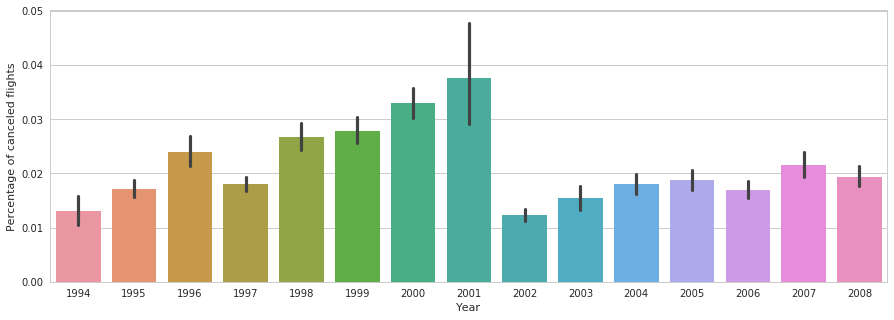

In [31]:
# Drop columns we don't need
yearly_df = canceled_df.drop(columns=['Month', 'Day'])

# Create the plot
ax = sns.barplot(x="Year", y="percentageCancelled", data=yearly_df);

# Labels
ax.set_ylabel("Percentage of canceled flights")

plt.show()

### Percentage of canceled flights aggregated per month (2001)

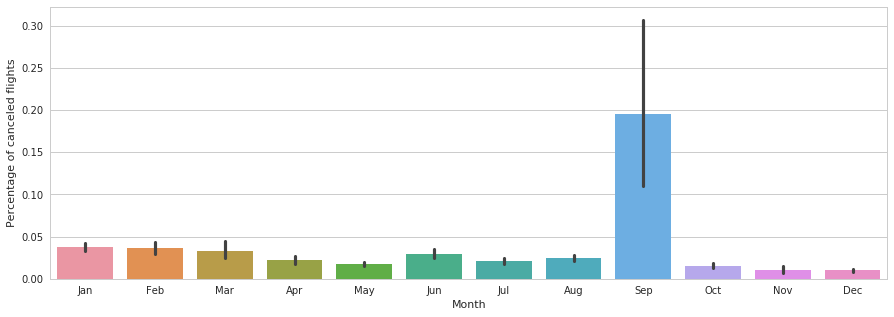

In [32]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Select a single year
year_df = canceled_df.loc[canceled_df['Year'] == 2001]

# Drop columns we don't need
year_df = year_df.drop(columns=['Year', 'Day'])

# Create the plot
ax = sns.barplot(x="Month", y="percentageCancelled", data=year_df);

# Labels
ax.set_xticklabels(months)
ax.set_ylabel("Percentage of canceled flights")

plt.show()

### Percentage of canceled flights aggregated per month (2002)

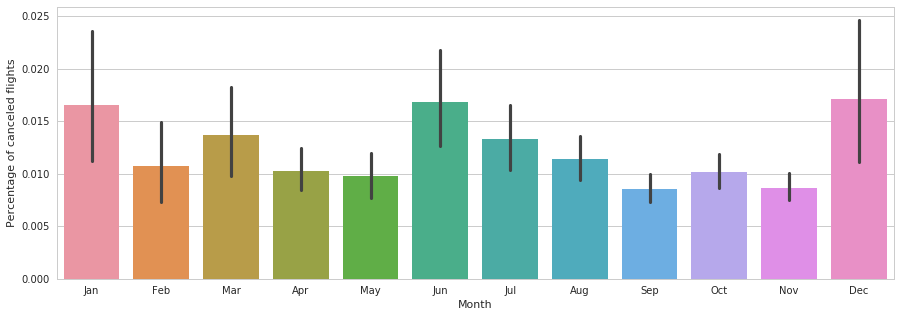

In [33]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Select a single year
year_df = canceled_df.loc[canceled_df['Year'] == 2002]

# Drop columns we don't need
year_df = year_df.drop(columns=['Year', 'Day'])

# Create the plot
ax = sns.barplot(x="Month", y="percentageCancelled", data=year_df);

# Labels
ax.set_xticklabels(months)
ax.set_ylabel("Percentage of canceled flights")

plt.show()

### Percentage of canceled flights aggregated per month (1994/1995/1996)

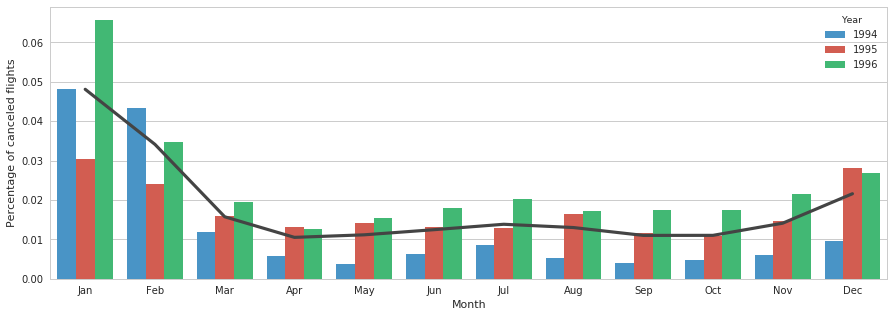

In [34]:
# Vars
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ["#3498db", "#e74c3c", "#2ecc71"]

# Select a single year
year_df = canceled_df.loc[canceled_df.Year.isin([1994, 1995, 1996])]

# Drop columns we don't need
year_df = year_df.drop(columns=['Day'])


# Pointplot
pt = sns.pointplot(x="Month", y="percentageCancelled", data=year_df,
              ci=None, markers="", color="#444444");

# Barplot
ax = sns.barplot(x="Month", y="percentageCancelled", hue="Year",
                 data=year_df, ci=None, palette=sns.color_palette(colors));

# Baroplot Labels
ax.set_xticklabels(months)
ax.set_ylabel("Percentage of canceled flights")

plt.show()

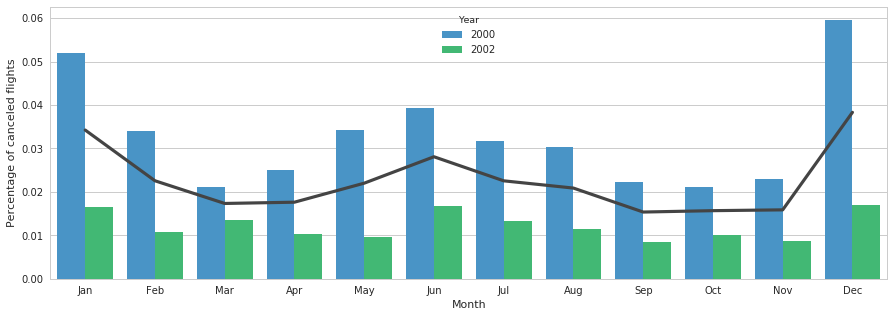

In [36]:
# Vars
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ["#3498db", "#2ecc71"]

# Select a single year
year_df = canceled_df.loc[canceled_df.Year.isin([2000, 2002])]

# Drop columns we don't need
year_df = year_df.drop(columns=['Day'])

# Pointplot
sns.pointplot(x="Month", y="percentageCancelled", data=year_df,
              ci=None,color="#444444", markers="", );

# Barplot
ax = sns.barplot(x="Month", y="percentageCancelled", hue="Year",
                 data=year_df, ci=None, palette=sns.color_palette(colors));

# Barplot Labels
ax.set_xticklabels(months)
ax.set_ylabel("Percentage of canceled flights")

plt.show()

# Query 2 - Weekly percentages of delays that are due to weather

In [37]:
# Load data from csv
weather_canceled_df = pd.read_csv('query2.csv/part-00000-3db66a5e-a01b-43d3-9add-f20f2c518f9b-c000.csv',
                                  parse_dates=False, dtype={'week':'int'})
weather_canceled_df.head()

,Year,week,percentage
0,2003,22,0.109589
1,2003,23,0.147023
2,2003,24,0.299003
3,2003,25,0.135690
4,2003,26,0.105898


### Percentage of canceled flights due to weather, aggregated per year

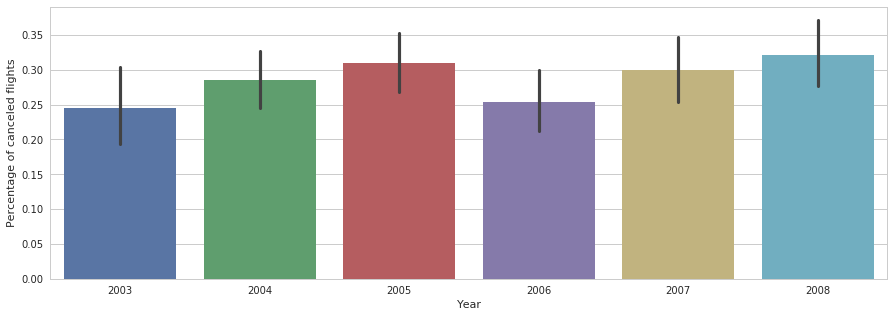

In [38]:
# Drop columns we don't need
weather_year_df = weather_canceled_df.drop(columns=['week'])

# Create the plot
ax = sns.barplot(x="Year", y="percentage", data=weather_year_df);

# Labels
ax.set_ylabel("Percentage of canceled flights")

plt.show()

### Percentage of canceled flights due to weather, aggregated per week for one year

In [12]:
# # Create a new plot (with a title) using figure, set the x axis to display dates
# p = figure(plot_width=900, plot_height=400,
#            title="Percentage of canceled flights per day", x_axis_type='datetime')
# colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# for year in range(2003, 2009):
#     i = year - 2003
#     weather_canceled_df_year = weather_canceled_df.loc[weather_canceled_df['Year'] == year]
#     #weather_canceled_df_year['week']= weather_canceled_df_year['week'].astype(str)
#     #yearly_df.Year = yearly_df.Year.astype(str)
#     # Load the Dataframe as Bokeh DataSource
#     source = ColumnDataSource(weather_canceled_df_year)
#     # Add a line renderer
#     p.line('week', 'percentage', source=source, color=colors[i])
#     p.y_range.start = 0
#     p.x_range.start = 1
#     p.x_range.end = 53
#     #p.x_axis_type = 'Integer'
    


# show(p) # show the results

In [13]:
from bokeh.models.tools import HoverTool
from bokeh.models import FuncTickFormatter

In [39]:
# Vars
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
year = 2004
i=2

# Create the plot figure
p = figure(plot_width=900, plot_height=400, x_axis_type='datetime',
           title="Percentage of canceled flights due to weather ({})".format(year))

# Select a single year
weather_canceled_df_year = weather_canceled_df.loc[weather_canceled_df['Year'] == year]

# Load the Dataframe as Bokeh DataSource
source = ColumnDataSource(weather_canceled_df_year)

# Add a line plot
p.line('week', 'percentage', source=source, color=colors[i])
# Add points to the line plot
p.circle('week', 'percentage', source=source, color=colors[i])

# Set start and end range for axes
p.y_range.start = 0
p.x_range.start = 1
p.x_range.end = 53

# Labels
p.xaxis.axis_label = "Week"
p.yaxis.axis_label = "Percentage of canceled flights"

# Hack to display week numbers correctly. Without this Bokeh will
# put 'ms' after the number of the week
label_dict = {}
for i in range(1, 54):
    label_dict[i] = i

p.xaxis.formatter = FuncTickFormatter(code="""
    var labels = %s;
    return labels[tick];
""" % label_dict)

# Add markerks to highlight the hovering
cr = p.circle('week', 'percentage', source=source, size=20,
              fill_color="grey", hover_fill_color=colors[3],
              fill_alpha=0, hover_alpha=0.5,
              line_color=None, hover_line_color="white")

# Add hover tooltips
p.add_tools(HoverTool(tooltips=[("%", "@percentage"), ("week", "@week")], renderers=[cr], mode='mouse'))

show(p)